# Diabetes Predictions with Machine Learning
## Data Modeling and Findings
#### Jack Yan
#### BrainStation, Data Science
#### Previous Notebook: Introduction, Data Gathering and Pre-processing

The previous notebook covered the data collection, data cleaning and some basic EDA. This notebook will cover the steps leading to modeling, the models used, the interpretation of the model and the next steps for this project.

First let's import the basic pandas and numpy libraries:

In [79]:
import numpy as np
import pandas as pd

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# The dataset should be in the file titled `Data_Cleaned.csv`
df = pd.read_csv('Data_Cleaned.csv')

### Models

The models we will be testing are:
- LogisticRegression - simple binary classification model
- Decision Tree - predicts the value of a target variable by learning simple decision rules inferred from the data features
- XGBoost - trains tree models sequentially, where each new model builds upon the strengths of the previous models

###  Scaling and Splitting

We will scale all of the non-binary columns with a `StandardScalar`, this scalar makes the mean of the data 0 and the standard deviation of the data 1. We will only scale non-binary columns as scaling binary columns do not make sense as the values are arbitrary. For example, if we scaled the `internet` column, we would likely not get 0 and 1 as unqiue values which means that an individual could potentially have negative or partial internet access. 

We will split the data into a test and a train set. \
Gridsearch includes cross validation that will automatically split the training data into training and validation sets, no validation set is necessary.


In [4]:
#importing spliting and scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Splitting the data into 2 seperate dataframes:

In [5]:
# get list of binary column names
bool_cols_names = [col for col in df if np.isin(df[col].unique(), [0, 1]).all()]

# split into binary and non binary dfs
num_cols = df.drop(columns = bool_cols_names)
bool_cols = df.drop(columns = list(num_cols.columns))

# df of all non-binary columns
num_cols.head()

#https://stackoverflow.com/questions/32982034/which-columns-are-binary-in-a-pandas-dataframe

,BMI,Weekly_Activity,Fruits,Vegetables,General_Health,Age,Education,Income
0,40,275,0.50,2.17,1.0,63.0,4.0,3.0
1,25,168,0.24,0.78,3.0,52.0,6.0,1.0
2,28,275,1.00,0.20,1.0,63.0,4.0,8.0
3,27,330,2.00,6.00,4.0,73.0,3.0,6.0
4,24,345,1.29,1.14,4.0,70.0,5.0,4.0


Scale all non-binary columns:

In [6]:
scaler = StandardScaler()
scaler.fit(num_cols)
num_cols_scaled = scaler.transform(num_cols)
num_cols_scaled

array([[ 1.70917385, -0.24279429, -0.64946038, ...,  0.52085629,
        -1.0712248 , -1.48139471],
       [-0.53163045, -0.41508993, -0.84571279, ..., -0.25230195,
         0.96190862, -2.44283015],
       [-0.08346959, -0.24279429, -0.2720519 , ...,  0.52085629,
        -1.0712248 ,  0.9221939 ],
       ...,
       [-0.08346959, -0.44407425, -0.14373302, ..., -1.86890556,
        -0.05465809, -1.96211243],
       [-0.83040436, -0.24279429,  0.48276504, ..., -0.25230195,
        -0.05465809, -2.44283015],
       [-0.53163045, -0.54068863,  0.48276504, ...,  0.52085629,
         0.96190862, -1.96211243]])

Look at scaled data:

In [7]:
num_cols_scaled = pd.DataFrame(num_cols_scaled, columns=list(num_cols.columns))
num_cols_scaled.head()

,BMI,Weekly_Activity,Fruits,Vegetables,General_Health,Age,Education,Income
0,1.709174,-0.242794,-0.649460,0.118349,-2.327385,0.520856,-1.071225,-1.481395
1,-0.531630,-0.415090,-0.845713,-0.759521,-0.459322,-0.252302,0.961909,-2.442830
2,-0.083470,-0.242794,-0.272052,-1.125826,-2.327385,0.520856,-1.071225,0.922194
3,-0.232857,-0.154231,0.482765,2.537227,0.474709,1.223727,-2.087792,-0.039242
4,-0.681017,-0.130078,-0.053155,-0.532159,0.474709,1.012866,-0.054658,-1.000677


Joining the binary and scaled dataframes:

In [8]:
df = pd.concat([bool_cols, num_cols_scaled], axis = 1)
df.head()

,Diabetes,High_BP,High_Chol,Chol_checked,Smoker,Stroke,Married,Health_Plan,Afford_Doctor,Working,...,Internet,Caucasian,BMI,Weekly_Activity,Fruits,Vegetables,General_Health,Age,Education,Income
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.709174,-0.242794,-0.649460,0.118349,-2.327385,0.520856,-1.071225,-1.481395
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,-0.531630,-0.415090,-0.845713,-0.759521,-0.459322,-0.252302,0.961909,-2.442830
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,-0.083470,-0.242794,-0.272052,-1.125826,-2.327385,0.520856,-1.071225,0.922194
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,-0.232857,-0.154231,0.482765,2.537227,0.474709,1.223727,-2.087792,-0.039242
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,-0.681017,-0.130078,-0.053155,-0.532159,0.474709,1.012866,-0.054658,-1.000677


Now that the data is scaled, we will seperate into testing and training data. 

Our target is diabetes which is the y, the remainder of the dataset is the X. \
We will split the data into 80% train and 20% test:

In [9]:
X = df.drop(columns='Diabetes')
y = df['Diabetes']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

# checking the shape of data
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (49075, 24)
Shape of train set: (196297, 24)


#### Target 

Since we noticed a class imbalance of diabetes status in the previous notebook, we need to address this issue first by upsampling the smaller class or downsampling the larger class. The advantage of downsampling is reduction in run time for code. However, we run the risk of removing important information. We will opt for upsampling using SMOTE instead. 

In [11]:
# note the imbalanced data size
df.groupby(['Diabetes']).size()

Diabetes
0.0    206844
1.0     38528
dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

Note that SMOTE is used for the training set only, we want to test the model on the imbalanced test set as it is most indicative of a real life scenario. 

In [13]:
# checking that counts are equal 
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))

Before OverSampling, counts of label '1': 30760
Before OverSampling, counts of label '0': 165537 

After OverSampling, counts of label '1': 165537
After OverSampling, counts of label '0': 165537


#### Accuracy, Precision and Recall 
Since our dataset is imbalanced, we do not want to use accuracy as the sole scoring metric. If that is the case, we can just predict no diabetes for everyone and still acquire an accurate result. Thus we can use a few other key metrics to better evaluate our model：precision and recall.

In [14]:
# the accuracy score if we just predicted 0 for every entry

1 - df['Diabetes'].mean()

0.8429812692564759

Lets define precision and recall for our data.

Precision: measure of patients that actually have diabetes out of all the patients we classify as having diabetes

Recall: of patients who actually have diabetes, recall tells us how many we correctly identified as having diabetes

Our context for this project aims to be an identifier for diabetes so health professionals can follow up with the patient. It is undesirable for our model to produce false negatives. Thus, for our model, we want to aim for high recall. That is, avoiding situations where the patient has diabetes, but our model predicts as them not having it (avoid false negatives). 

The formula for recall is below:

$$Recall = \frac{\text{number of true positives}}{\text{number of true positives} + \text{number of false negatives}} = \frac{TP}{TP+FN}$$

Recall increase when our false negatives decrease. This is something we can adjust for during modeling.

We can address precision and recall more in detail after we optimize our model. For now, we will set gridsearch to score for recall instead of accuracy. 

### Modeling

We will fit a few differenent machine learning models and optimize the hyperparameters for each using gridsearch. The models that we will be using are:
- Logistic Regression
- Decsion Trees
- XGboost

The gridsearch will optimize for the recall score rather than accuracy. \
We will train on the smote data and evaluate the score on the test data

In [15]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

In [18]:
model = [('model', LogisticRegression())]
pipeline = Pipeline(model)

# define a list of parameter dictionaries to use
param_grid = [

    # logistic regression
    {
        'model': [LogisticRegression()],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['saga', 'newton-cg', 'lbfgs', 'liblinear'],
        'model__C': [*(10 ** n for n in range(-3, 4))],
        'model__random_state': [42]
    },

    # Decision Tree
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [*range(1, 15, 2)],
        'model__min_samples_leaf': [*range(1, 15, 2)],
        'model__random_state': [42]
    },

    # XGBoost
    {
        'model': [XGBClassifier()],
        'model__max_depth': [*range(1, 5, 1)],
        'model__n_estimators': [*range(1, 1000, 100)],
    }
]

# set up a grid search
grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='recall',
        cv=5,
        n_jobs=-1)


grid_result = grid_search.fit(X_train_sm, y_train_sm)

In [19]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.834157 using {'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=1,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=301, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None), 'model__max_depth': 1, 'model__n_estimators': 301}


In [20]:
# save the grid search object
joblib.dump(grid_result, 'grid_search.pkl')

['grid_search.pkl']

### Interpretation

After selecting our best model, we will attempt to tune the scoring according to the factors we discussed earlier in the notebook. We will also discover which factors affect diabetes predictions the most using SHAP.

#### Confusion matrix
First, we need to construct a confusion matrix with the best model from the gridsearch. The confusion matrix tells us the ratios between the values in the test set that our model predicted as 0 or 1 vs the actual counts of 0 or 1. Then we can use the matrix to analyze our precision and recall scores. While we want to aim for high recall, we cannot let precision drop too much. There is a harmonized score called f1 score that is the combination of precision and recall that is used in tandem with accuracy to judge most models.

In [36]:
grid_best = XGBClassifier(n_estimators=300, max_depth=1, random_state=42)
grid_best.fit(X_train_sm, y_train_sm)

# Pickle our best model 
joblib.dump(grid_best, 'grid_best.pkl')

['grid_best.pkl']

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [87]:
# Classify the test set
y_pred = grid_best.predict(X_test)

# Put into a dataframe and check
class_df = pd.DataFrame(y_pred, columns=['predicted class'])

# Checking the distribution of predicted output classes
class_df['predicted class'].value_counts(normalize=True)

0.0    0.738217
1.0    0.261783
Name: predicted class, dtype: float64

In our test set, our model predicted 74% with no diabetes and 26% as having diabetes. 

In [39]:
# Build the confusion matrix as a dataframe
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted 0', 'Predicted 1'])

# Add a column that sums up the actuals
confusion_df['Sum of Actuals'] = confusion_df.sum(axis=1)

# Add a row that sums up the predictions
confusion_df = confusion_df.append(pd.Series(confusion_df.sum(axis=0)), ignore_index=True)

# Fix the indices
confusion_df.index=['Actual 0', 'Actual 1', 'Sum of Predictions'] 

# Check
confusion_df

,Predicted 0,Predicted 1,Sum of Actuals
Actual 0,33502,7805,41307
Actual 1,2726,5042,7768
Sum of Predictions,36228,12847,49075


In the confusion matrix, we see that 
- we correctly identified 33,000 individuals without diabetes and 5000 individuals with diabetes. 
These are our true predictions

However, our model predicted that 
- 7800 individuals without diabetes have it, these are false positives 
- With the 2700 individuals that have diabetes, our model classfied them as no diabetes, these are false negatives

Now let's create a classification report to look at our preicision, recall and f1 scores:

In [40]:
print('Classification report for a threshold of 0.5 \n')
print(classification_report(y_test, y_pred))

Classification report for a threshold of 0.5 

              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     41307
         1.0       0.39      0.65      0.49      7768

    accuracy                           0.79     49075
   macro avg       0.66      0.73      0.68     49075
weighted avg       0.84      0.79      0.80     49075



Our score we want to focus on is the recall for true diabetes (recall, 1.0) which is 0.65

We want to reduce the number of false negatives our model predicts. This is because we want less patients with diabetes to slip through our system that we created. However, we do not want to increase the false positives so much that it will pressure an unnecessary number of individuals to be worried that they are at risk for diabetes.

We can shift the probability that an individual is classified as having diabetes to a lower value. That way, we can increase the recall score for our diabetes class by lowering the requirements for diabetes.

In [94]:
# If the probability that a data point belongs to the positive class is greater than 0.35
# it gets classified as 1; otherwise, it gets classified as 0

probabilities = grid_result.predict_proba(X_test)

y_proba = probabilities[:, 1]

y_pred_35 = np.where(y_proba > 0.35, 1, 0)

print('Classification report for a threshold of 0.35 \n')
print(classification_report(y_test, y_pred_30))

Classification report for a threshold of 0.35 

              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79     41307
         1.0       0.32      0.81      0.46      7768

    accuracy                           0.70     49075
   macro avg       0.64      0.74      0.63     49075
weighted avg       0.85      0.70      0.74     49075



Now our recall score is 0.81, a better value than the recall at the previous 0.5 threshold. The f1 score is slightly lower 

Next, we will look at which variables affected our decision the most using SHAP.

### SHAP
The SHapley Additive exPlanations, SHAP uses Shapley values to explain individual predictions. Borrowing ideas from game theory, the motivating problem is as follows: in a game played by a coalition of players, we want to fairly distribute the payout of the game based on each player’s contribution.

For more information, the SHAP documentation can be found [here](https://shap.readthedocs.io/en/latest/index.html)

In [43]:
import shap
shap.initjs()

First, we will fit our best model for SHAP. We will use the training set as SHAP explains model, not the results. 

In [96]:
# Fit tree-specific kernel for SHAP  
explainer = shap.TreeExplainer(grid_best)

# Obtain SHAP values 
shap_values = explainer.shap_values(X_train_sm)

# https://slundberg.github.io/shap/notebooks/Census%20income%20classification%20with%20XGBoost.html

#### Single force plot
First, we will look at a single shap output, a force plot. This is how the features for our first row of data in our training set impacted the prediction compared to the average prediction.

Let's take a look at the force plot of the first entry below

Note that all values here are pre-scaled before using our scaler, the value is scaled to be how far it away from the median.
Note that binary values are not scaled

In [113]:
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], 
                X_train_sm.iloc[0,:], 
                link = 'logit'
               )

In this graph, the base value is the base value of the model without any features. Here it is at the 0.5 mark which signals a coin toss on whether that person is predicted to have diabetes or not. 

The f(x) value is the value predicted by the model. Here, we see that the model predicts a 2% chance of diabetes.

Each feature shifts the prediction postively or negatively. Blue signals a negative prediction shift while red signals a positive prediction shift. The factors with the largest impact are closer to the f(x) line. 

We can see that a decrease in weekly activity from the median pushes the prediction positively. For negative factors, the individual's BMI and age are lower than the median of the sample and general health is higher than the median of the sample. Thus, these push the prediction negatively.

#### Aggregated force plot

Each observation has its own force plot. If all the force plots are combined, rotated 90 degrees and stacked horizontally, we get the force plot of the entire training data: 

In [81]:
# keeping only the first 1500 entries for browser safety
shap.force_plot(explainer.expected_value, shap_values[:1500,:], X_train_sm.iloc[:1500,:])

This is an interactive plot that plots either the entire sample or a single factor on the x axis and either the f(x) value or a single factor on the y axis. 

We find that this plot is easier to understand if the x axis is set on a non-binary column and the y axis is set on f(x).

If we select the general_health vs f(x) graph(user interactive so the reader would need to select this themselves), we can see that values before 0 (median) shifts the prediction positively(red). While values after 0 shifts the prediction negatively(blue).  

If we select the BMI vs f(x) graph, we can see that values before 0 overwhelmingly shifts the prediction negatively. While values after 0 shift the prediction positively.  

#### Violin summary plot
Having calculated Shapley values for each feature and each prediction, we can also use Shapley values for global interpretation. We will explore several options below. 

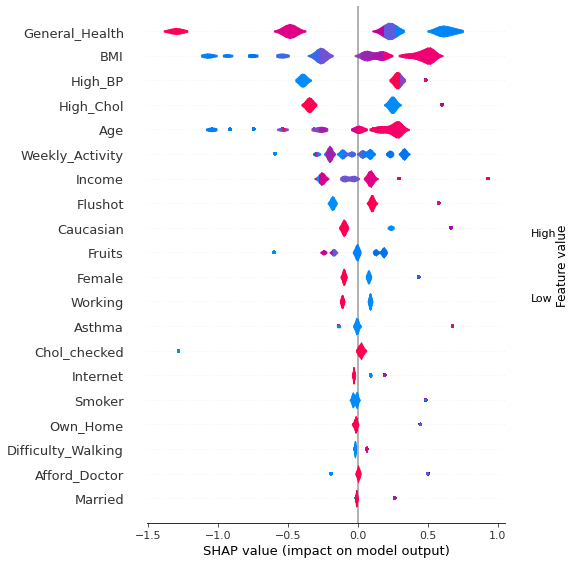

In [117]:
shap.summary_plot(shap_values, X_train_sm, plot_type = 'violin')

In this plot, the distance away from the line shows the magnitude of impact that feature has with the given value.
The color represents the value of the feature. Red is high and blue is low.  

For our model, our most significant changer of model output is general health. When an individual's general health is high, it has a negative impact on diabetes status. When general health is low, it has a positive impact on diabetes status. 

BMI conversely has the opposite effect. When an individual's BMI is high, it has a positive impact on diabetes status. When BMI is low, it has a negative impact on diabetes status. 

These findings are similar to what we see in the force plot above and in the correlations in the previous notebook. 

#### Bar summary
It can be hard to interpret the overall impact of the summary plot above. We can use a bar chart instead to find the best 
However, we do not know which direction these features shift the prediction which is why it is useful to use the bar and summary plot in tandem.

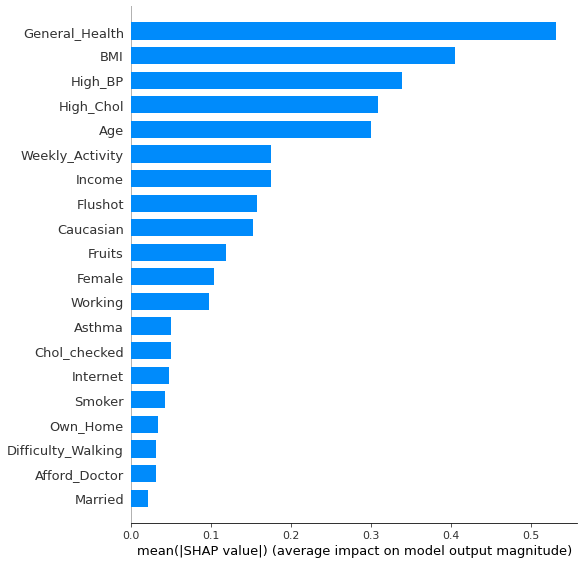

In [123]:
shap.summary_plot(shap_values, X_train_sm, plot_type="bar")

Here we see that general health, BMI, blood pressure status, cholestrol status and age affect diabetes status the most. 

### Conclusion and Next Steps

Of the 3 business questions we aimed to answer we confidently can answer the first 2 with this project. The last question, “Can we use the most predictive features to create a questionnaire for determining diabetes?” can be used as the guiding question for the next part of the project.

Have we trained a model to accurately predict diabetes?

Our best model predicts 79% accuracy with a 0.8 f1-score and a 0.65 recall score for the diabetes class. If we select for increased recall by lowering the threshold the model predicts diabetes, we get a 70% accuracy score with a 0.74 f1-score and a 0.81 recall score for the diabetes class at a threshold of 0.35. 

We would say this is a good prediction of diabetes but not ideal. The sample size is good. Perhaps during the data processing step, we could have included more factors into the dataframe used to train the model or coded certain characteristics such as marriage status differently. There were also additional machine learning models not explored in this project. Training a neural network can be the next step for this project in terms of modeling.

Which factors are most predictive of diabetes?

General health, BMI, blood pressure status, cholestrol status and age affect diabetes status the most. Weekly activity, income, flu shot status, race, fruit intake, sex and working status affect diabetes status somewhat.

The future roadmap for this project would be to improve the overall accuracy of the model, then to install this model in a clinical setting. Ideally, we would want either to create a questionnaire for determining diabetes using the most predictive features or embed the elements of a diabetes patient in a system and patients meeting the characteristics are automatically flagged for a test recommendation.